In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in/reordering trumps tweets
df = pd.read_csv('realdonaldtrump.csv')
df_tweets = df[['id', 'date', 'content']]

df_tweets.head(3)

,id,date,content
0,1698308935,2009-05-04 13:54:25,Be sure to tune in and watch Donald Trump on L...
1,1701461182,2009-05-04 20:00:10,Donald Trump will be appearing on The View tom...
2,1737479987,2009-05-08 08:38:08,Donald Trump reads Top Ten Financial Tips on L...


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [4]:
# Getting the vader score
df_tweets['scores'] = df_tweets['content'].apply(lambda review: sid.polarity_scores(review))

# Extracting the compound score
df_tweets['compound']  = df_tweets['scores'].apply(lambda score_dict: score_dict['compound'])

# Labl
df_tweets['comp_score'] = df_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df_tweets.head()

,id,date,content,scores,compound,comp_score
0,1698308935,2009-05-04 13:54:25,Be sure to tune in and watch Donald Trump on L...,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.5255,pos
1,1701461182,2009-05-04 20:00:10,Donald Trump will be appearing on The View tom...,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",0.7712,pos
2,1737479987,2009-05-08 08:38:08,Donald Trump reads Top Ten Financial Tips on L...,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.6468,pos
3,1741160716,2009-05-08 15:40:15,New Blog Post: Celebrity Apprentice Finale and...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,1773561338,2009-05-12 09:07:28,"""My persona will never be that of a wallflower...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


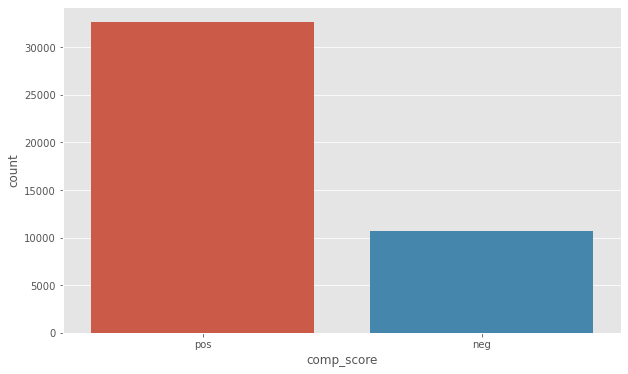

In [5]:
# Count of Negative vs Positive Tweets
plt.figure(figsize=(10,6))
ax = sns.countplot(x="comp_score", data=df_tweets)